In [25]:
import csv
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [26]:
Relations = pd.read_csv('Relations_updt.csv', index_col=0)
Followers_gabi = Relations.columns.to_list()
Following_gabi = Relations.index.to_list()

### NOTA: Si alguien no aparece en followers es que no sigue a Gabi. Si no aparece en Following es que no sigue a ningún Follower


In [27]:
## Por ahora vamos a buscar relaciones mútuas entre los followers de Gabi. Si alguien que no es follower sigue a 2 followers, también puede aportar información pero lo pensaré luego.
Impos = [x for x in Following_gabi if x not in Followers_gabi] ## Quienes de los que sigue Gabi, siguien a algún follower pero no la siguen a ella. (Maricas que no devuelven el follow)
Islas = [x for x in Followers_gabi if x not in Following_gabi] ## Maricas que siguen a Gabi pero no siguen a nadie


In [28]:
Relations_cuad = Relations.drop(Impos) ### Algunos Followers no los sigue ningún otro
Relations_cuad = Relations_cuad.drop(columns = Islas)


In [29]:
Relations_cuad_sort_names = sorted(Relations_cuad.columns.to_list())
Relations_cuad_sort = pd.DataFrame()
for i in Relations_cuad_sort_names:
    Relations_cuad_sort[i] = Relations_cuad[i]

Relations_cuad_sort = Relations_cuad_sort.sort_index()




In [37]:
Parejas_dic = {}
Parejas_list_tupla = []
Parejas_lista_lista = []
set_followers_w_one_lazo = []
for i in Relations_cuad_sort_names:
    for j in Relations_cuad_sort_names:
        if i == j:
            break
        else:
            vlue = Relations_cuad_sort.at[i,j]
            vlue2 = Relations_cuad_sort.at[j,i]
            Dif = vlue - vlue2
            if vlue != 0 and Dif == 0:
                Parejas_dic[i] = j
                set_followers_w_one_lazo.append(i)
                set_followers_w_one_lazo.append(j)
                Parejas_list_tupla.append((i,j))

Parejas_lista_lista = set_followers_w_one_lazo
set_followers_w_one_lazo = list(set(set_followers_w_one_lazo))
Filtro_nodes = []
Filtro_edges = []
for i in set_followers_w_one_lazo:
    if Parejas_lista_lista.count(i) >= 8:
        Filtro_nodes.append(i)


for i in Parejas_list_tupla:
    for j in Filtro_nodes:
        if (i[1] in Filtro_nodes and i[0] in Filtro_nodes) and not (i in Filtro_edges):
            Filtro_edges.append(i)



In [39]:
Followers_i = []
Followers_gabi = Filtro_nodes
Followers_gabi_num = len(Filtro_nodes)


for i in Followers_gabi:
    num_seg = get_following_and_followers_num(i)[1]
    Followers_i.append(get_followers_names(i,num_seg))

conteo = []
Listota = [item for sublist in Followers_i for item in sublist]
ListotaSet = list(set(Listota))
for i in ListotaSet:
    conteo.append(Listota.count(i))

Tabla = pd.DataFrame()
Tabla['Usuario'] = ListotaSet
Tabla['Cuenta'] = conteo
Tabla = Tabla.sort_values(['Cuenta'],ascending=False)
Tabla_filter = Tabla.head(31)
Usuarios_filter = Tabla_filter['Usuario'].to_list()
Usuarios_filter.remove('gabal_2003')
for i in Usuarios_filter:
    driver.get('https://www.instagram.com/' + i)
    sleep(3)
    Follow = driver.find_element(By.XPATH,'/html/body/div[2]/div/div/div/div[1]/div/div/div/div[1]/div[1]/div[2]/section/main/div/header/section/div[1]/div[1]/div/div[1]/button'
                ).click()
    sleep(3)

['dileepsingh2773', 'ashutosh.jatt.984', 'shaymu.bhai', 'suarabh_jatav', 'pradeepchaurasia501', 'sandeepkumarsandeep527913', 'ramup1894', 'maheshbhai3074', 'abhi.she5083', 'dhar.mendrakumar133', 'faizshah7892', 'dkroshani_90']


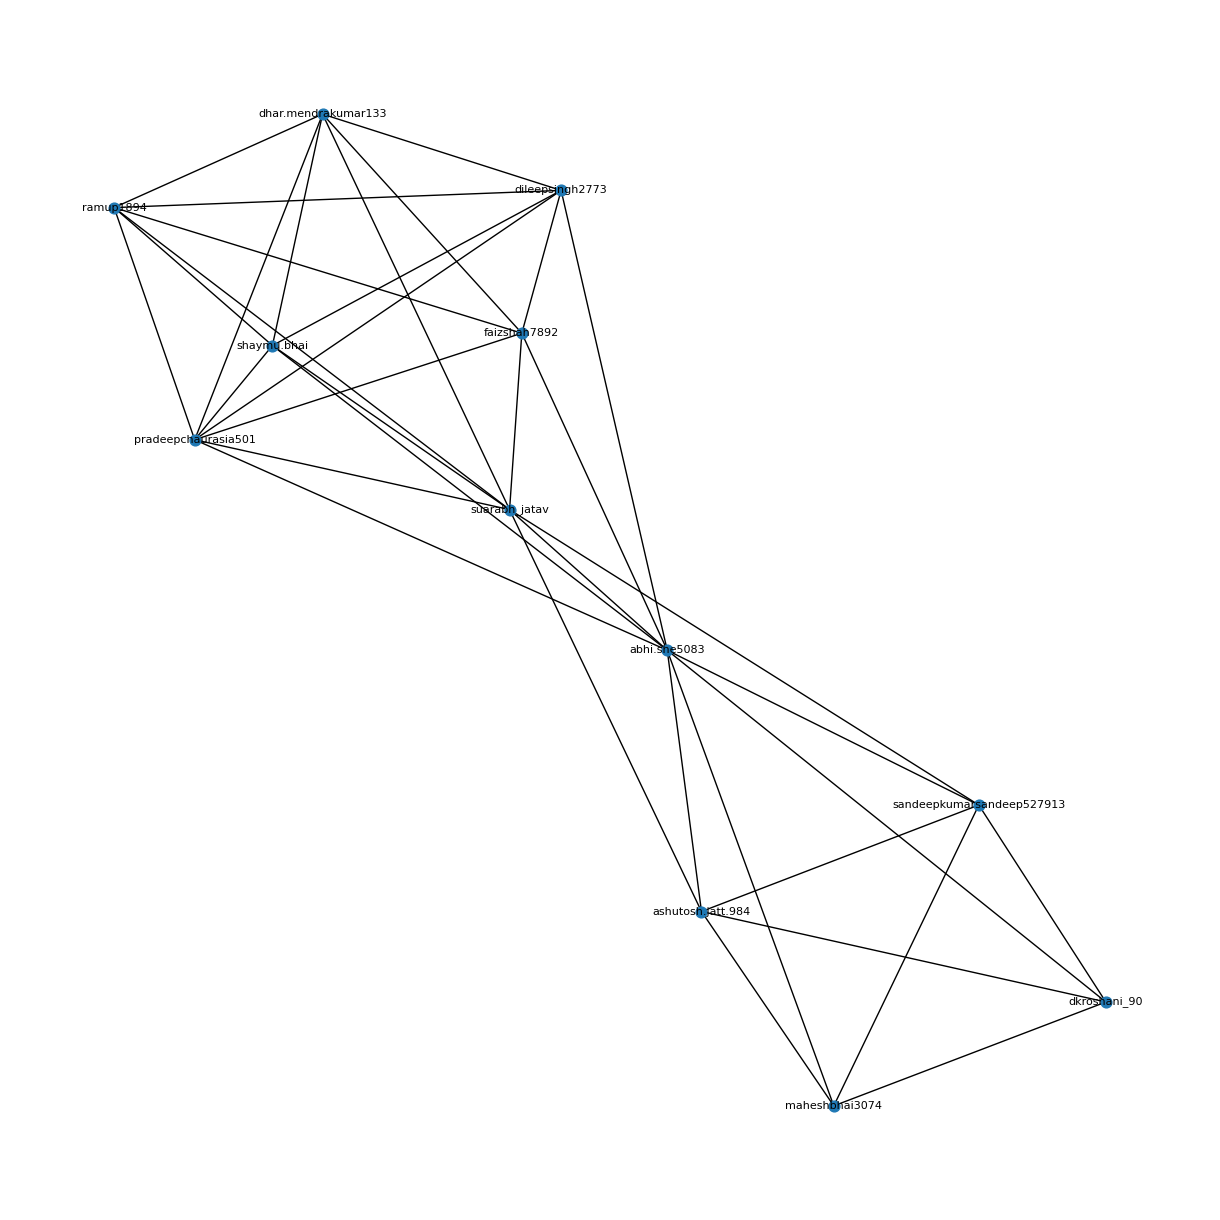

In [38]:
plt.figure(figsize=(12,12)) 
G_filtro = nx.Graph()
G_filtro.add_nodes_from(Filtro_nodes)
G_filtro.add_edges_from(Filtro_edges)
pos_filtro = nx.spring_layout(G_filtro, k=0.15, iterations=20)
nx.draw(G_filtro,  pos_filtro, with_labels=True,node_size=60,font_size=8)





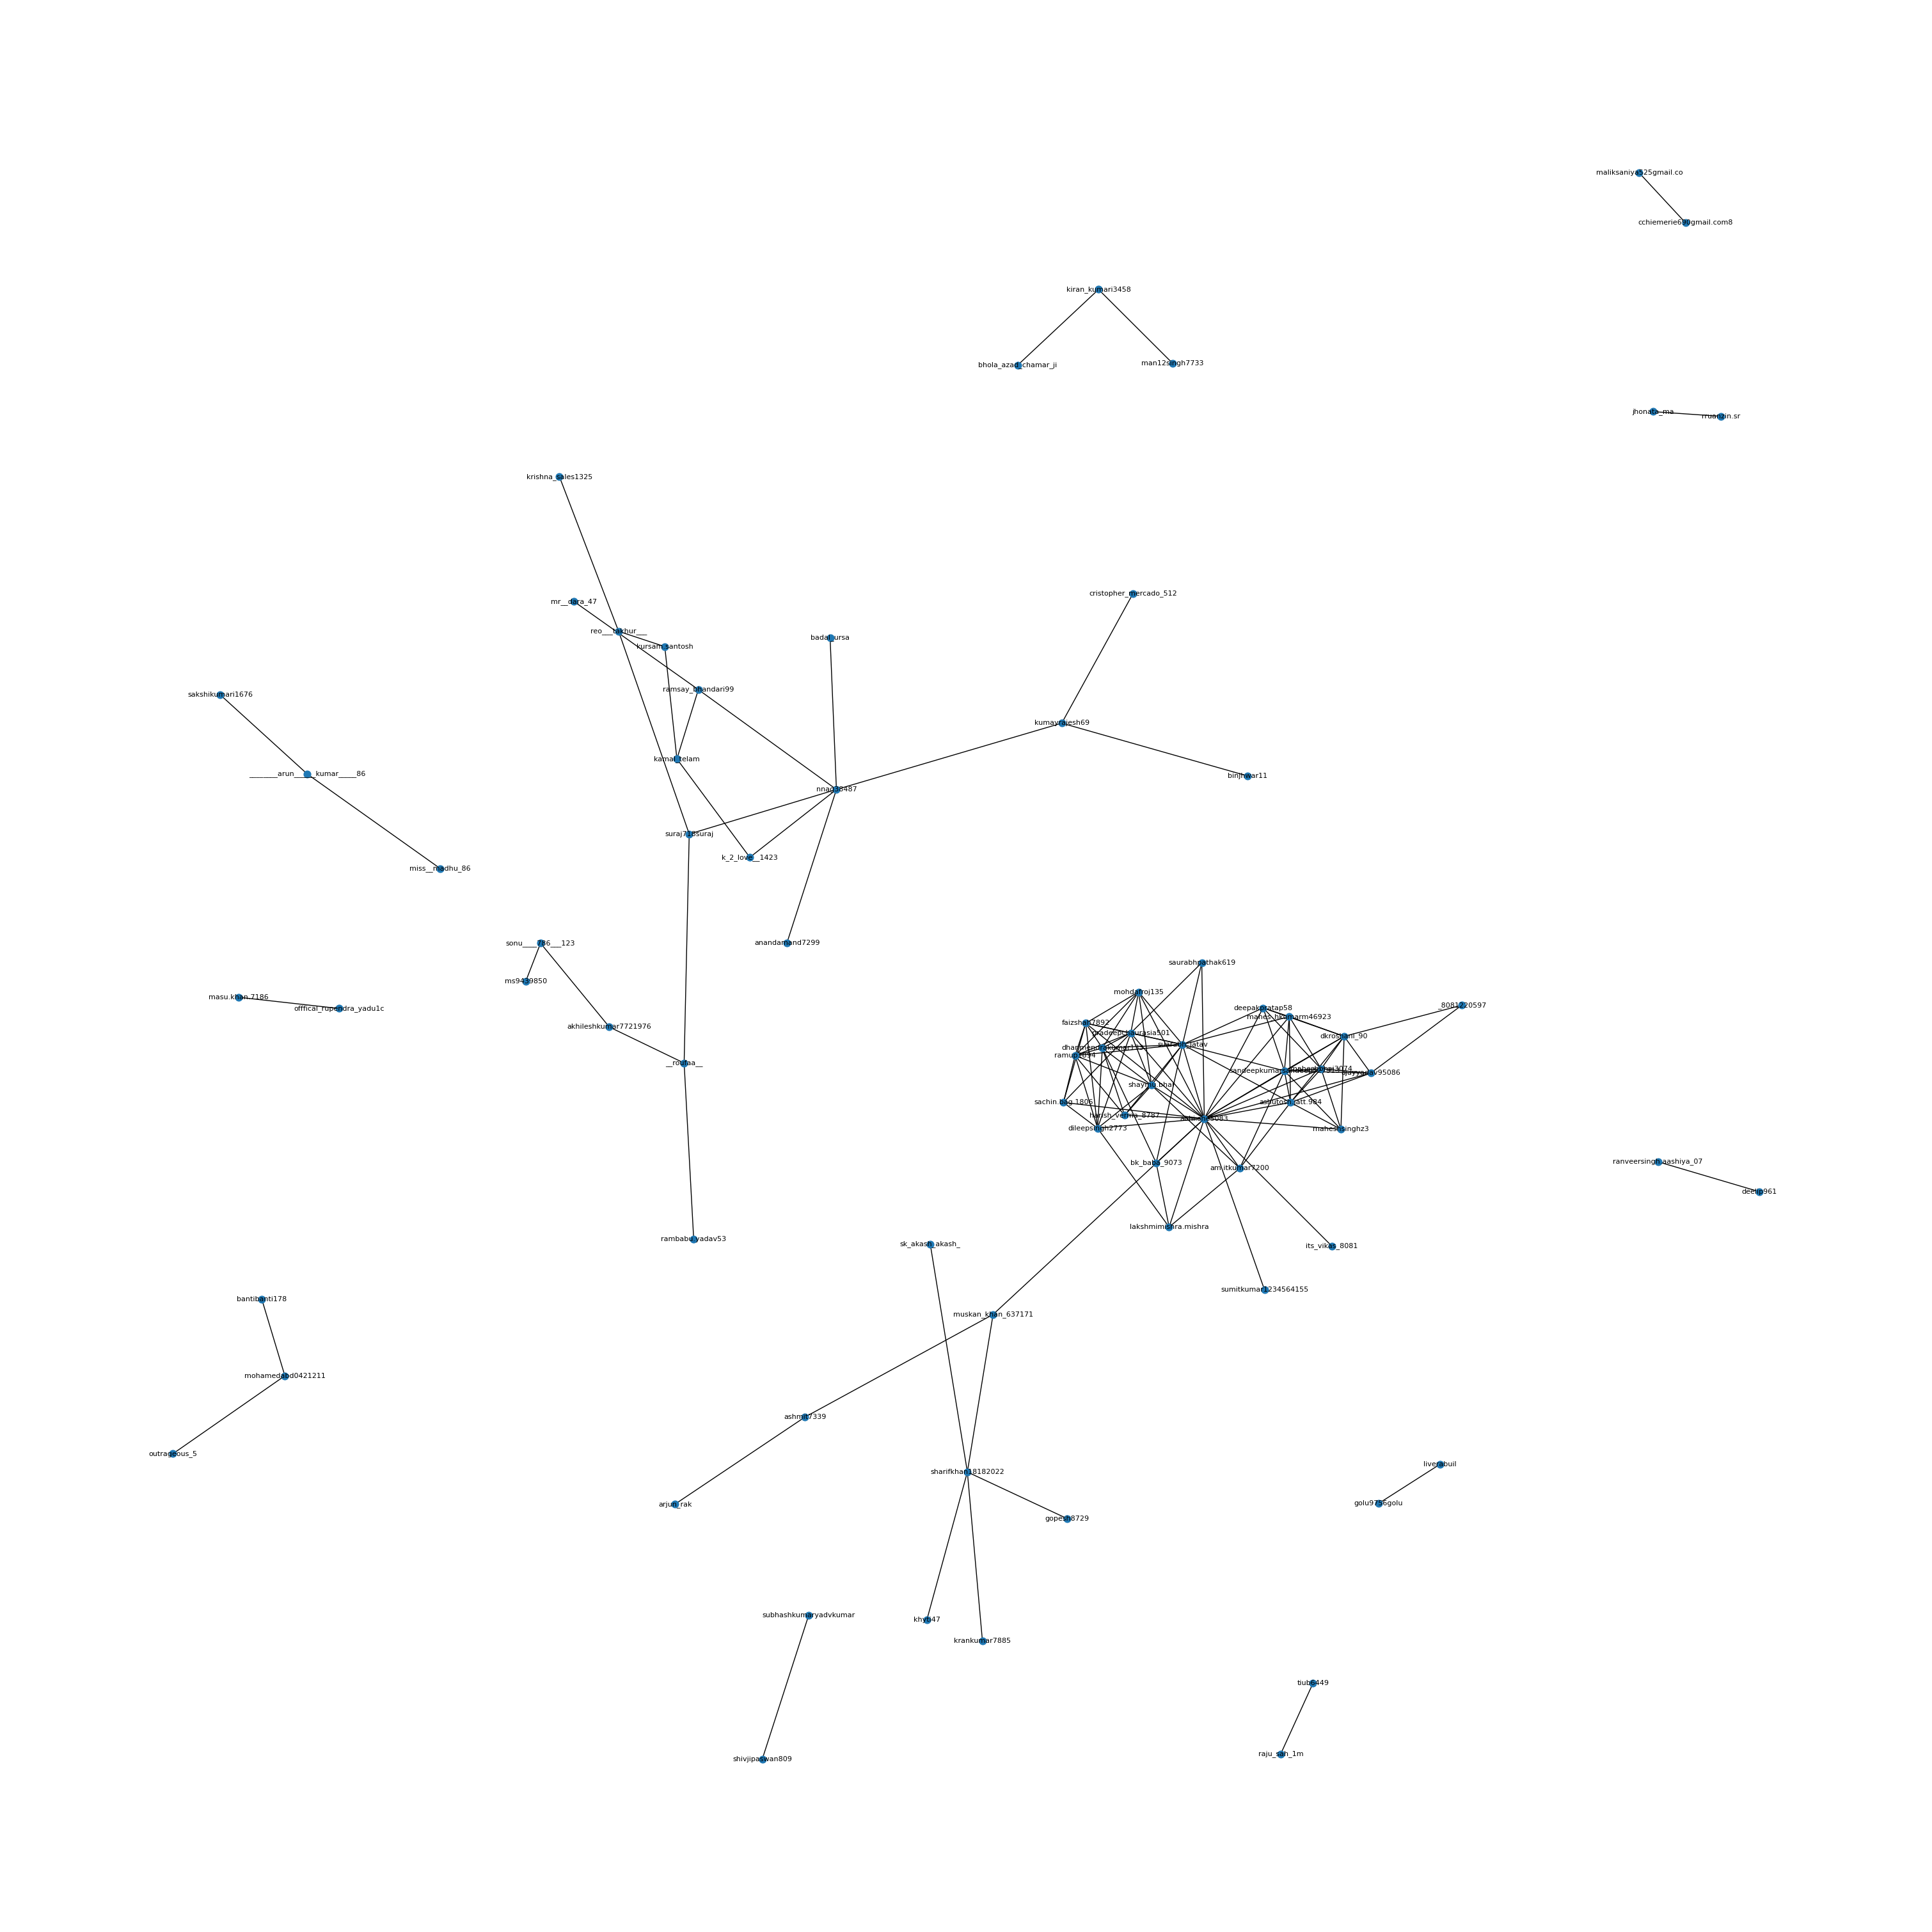

In [32]:
plt.figure(figsize=(30,30)) 
G = nx.Graph()
G.add_nodes_from(set_followers_w_one_lazo)
G.add_edges_from(Parejas_list_tupla)
pos = nx.spring_layout(G, k=0.1, iterations=20)
nx.draw(G,  pos, with_labels=True,node_size=60,font_size=8)

##NOTA: Los maricas que quedan solos es porque ellos siguen a alguien pero no les devolvieron el follow